In [13]:
import numpy as np
import os

# Path to the .npy file
data_path = os.path.expanduser(
    "/Users/jasonwang/Library/CloudStorage/OneDrive-UniversityofVirginia/Coding/tennis/data/initial/angles/joint_angles_gender.npy"
)

# Load the data
try:
    data = np.load(data_path, allow_pickle=True)
except Exception as e:
    print(f"Error loading file: {e}")
    exit(1)

print(f"Type of loaded data: {type(data)}")

# If it's a structured numpy array or object array, try to explore columns/fields
if isinstance(data, np.ndarray):
    print(f"Shape: {data.shape}")
    print(f"Dtype: {data.dtype}")
    if data.dtype.names:
        print(f"Column names: {data.dtype.names}")
    elif data.dtype == object:
        # Check for 0-dimensional object array
        if data.shape == ():
            obj = data.item()
            print(f"Loaded a single object of type: {type(obj)}")
            if hasattr(obj, 'keys'):
                print(f"Keys: {list(obj.keys())}")
            elif hasattr(obj, 'columns'):
                print(f"Columns: {list(obj.columns)}")
            elif isinstance(obj, (list, tuple)):
                print(f"Object is a {type(obj)} of length {len(obj)}")
                for i, item in enumerate(obj[:5]):
                    print(f"\nElement {i}:")
                    print(f"  Type: {type(item)}")
                    if hasattr(item, 'keys'):
                        print(f"  Keys: {list(item.keys())}")
                    elif hasattr(item, 'columns'):
                        print(f"  Columns: {list(item.columns)}")
                    else:
                        print(f"  Value: {item}")
            else:
                print("Object does not have 'keys', 'columns', or is not a list/tuple.")
        else:
            print("Object array is not 0-dimensional. Further inspection needed.")
    else:
        print("Standard ndarray, no column names.")
else:
    print("Loaded object is not a numpy ndarray.")


Type of loaded data: <class 'dict'>
Loaded object is not a numpy ndarray.


In [30]:
import pandas as pd

# Load csv file
scorebug_df = pd.read_csv("/Users/jasonwang/Library/CloudStorage/OneDrive-UniversityofVirginia/Coding/tennis/data/scorebug/usopen_points_with_scorebug.csv")

# Remove '.jpg' from video_name
scorebug_df['video_name'] = scorebug_df['video_name'].str.replace(r'\.jpg$', '', regex=True)

# For faster lookup, group by video_name
scorebug_grouped = scorebug_df.groupby('video_name')

# Merge: for each key in data, add serve speed from scorebug under 'speed' as an int (or None if missing)
for key in data.keys():
    if key in scorebug_grouped.groups:
        speeds = scorebug_grouped.get_group(key)['Speed_MPH'].tolist()
        data[key]['speed'] = int(speeds[0]) if len(speeds) > 0 and pd.notnull(speeds[0]) else None
    else:
        data[key]['speed'] = None


In [31]:
data['Carlos Alcaraz vs. Botic van de Zandschulp Full Match ｜ 2024 US Open Round 2.f617_42.4_223053']

{'angles': array([[ 23.0695172 ,  10.44955332, 151.45007381, 151.48562379,
          13.03132191,  17.07815139,   9.34769293,  33.11066504],
        [ 26.81514279,  10.23389706, 149.94676947, 152.30349689,
          14.27402691,  17.23420449,   9.17726495,  34.04236012],
        [ 28.69383989,  10.11228395, 149.01301459, 152.24488027,
          14.77334521,  16.87534926,   9.12904169,  34.41370089],
        [ 29.29618695,  10.09522833, 148.4436471 , 151.55725182,
          14.68618395,  16.07086242,   9.16466156,  34.35861367],
        [ 29.21276246,  10.19324456, 148.03350494, 150.48808942,
          14.16945025,  14.89002067,   9.24576299,  34.01102476],
        [ 29.03414488,  10.41684696, 147.57742606, 149.28487096,
          13.38005122,  13.40210071,   9.33398439,  33.50486049],
        [ 30.25888918,  10.89522969, 147.0306733 , 148.40834195,
          12.74977737,  11.71643212,   9.51951228,  33.41821515],
        [ 33.96606604,  11.62787202, 145.26456495, 147.95885689,
        

In [ ]:
data = {k: v for k, v in data.items() if 'speed' in v and v['speed']}
print(f"Number of instances with a value in 'speed': {len(data)}")

Number of instances with a value in 'speed': 2966


Correlation of joint angle metrics with speed:
 left_shoulder_mean     0.172089
left_hip_mean          0.142474
left_knee_std          0.132150
left_knee_mean         0.123214
right_hip_mean         0.121870
right_knee_mean        0.121673
right_hip_std          0.089205
right_shoulder_mean    0.089099
left_hip_std           0.057307
right_knee_std         0.042347
left_elbow_std         0.018862
right_shoulder_std     0.004180
left_elbow_mean        0.002750
left_shoulder_std     -0.025175
right_elbow_mean      -0.085526
right_elbow_std       -0.090561
dtype: float64


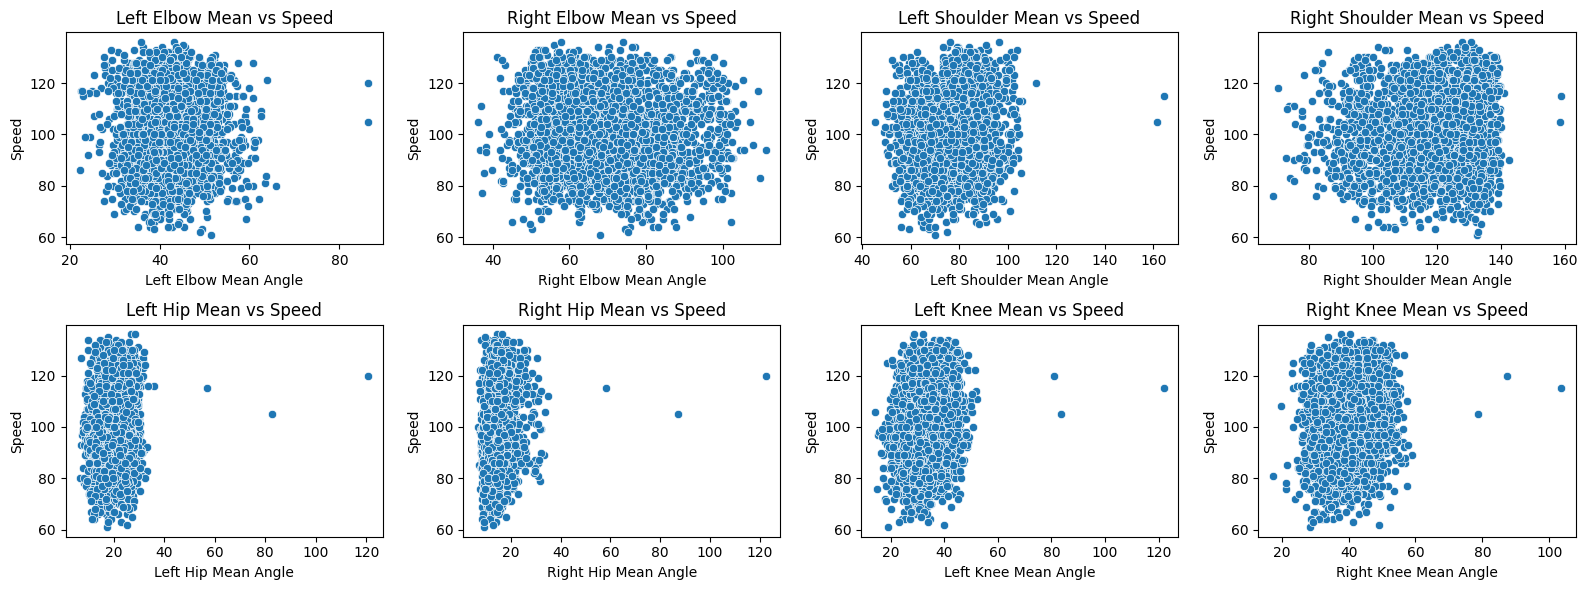

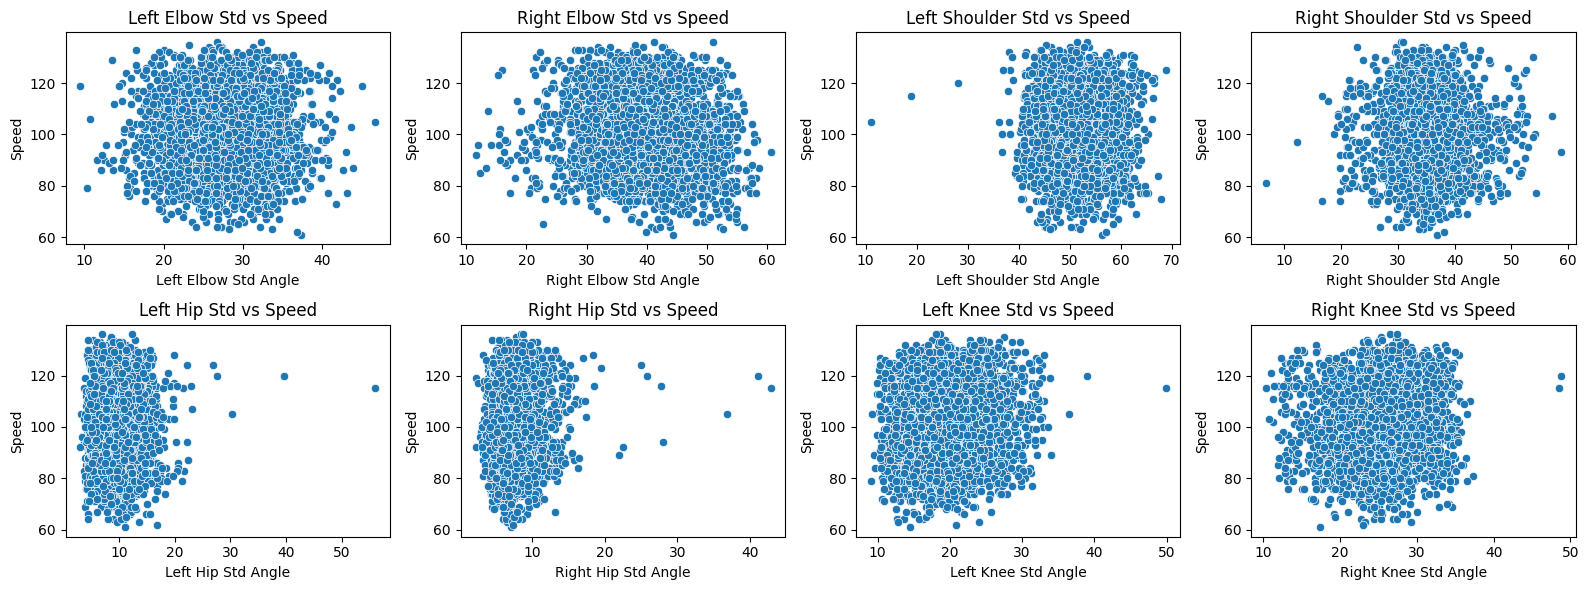

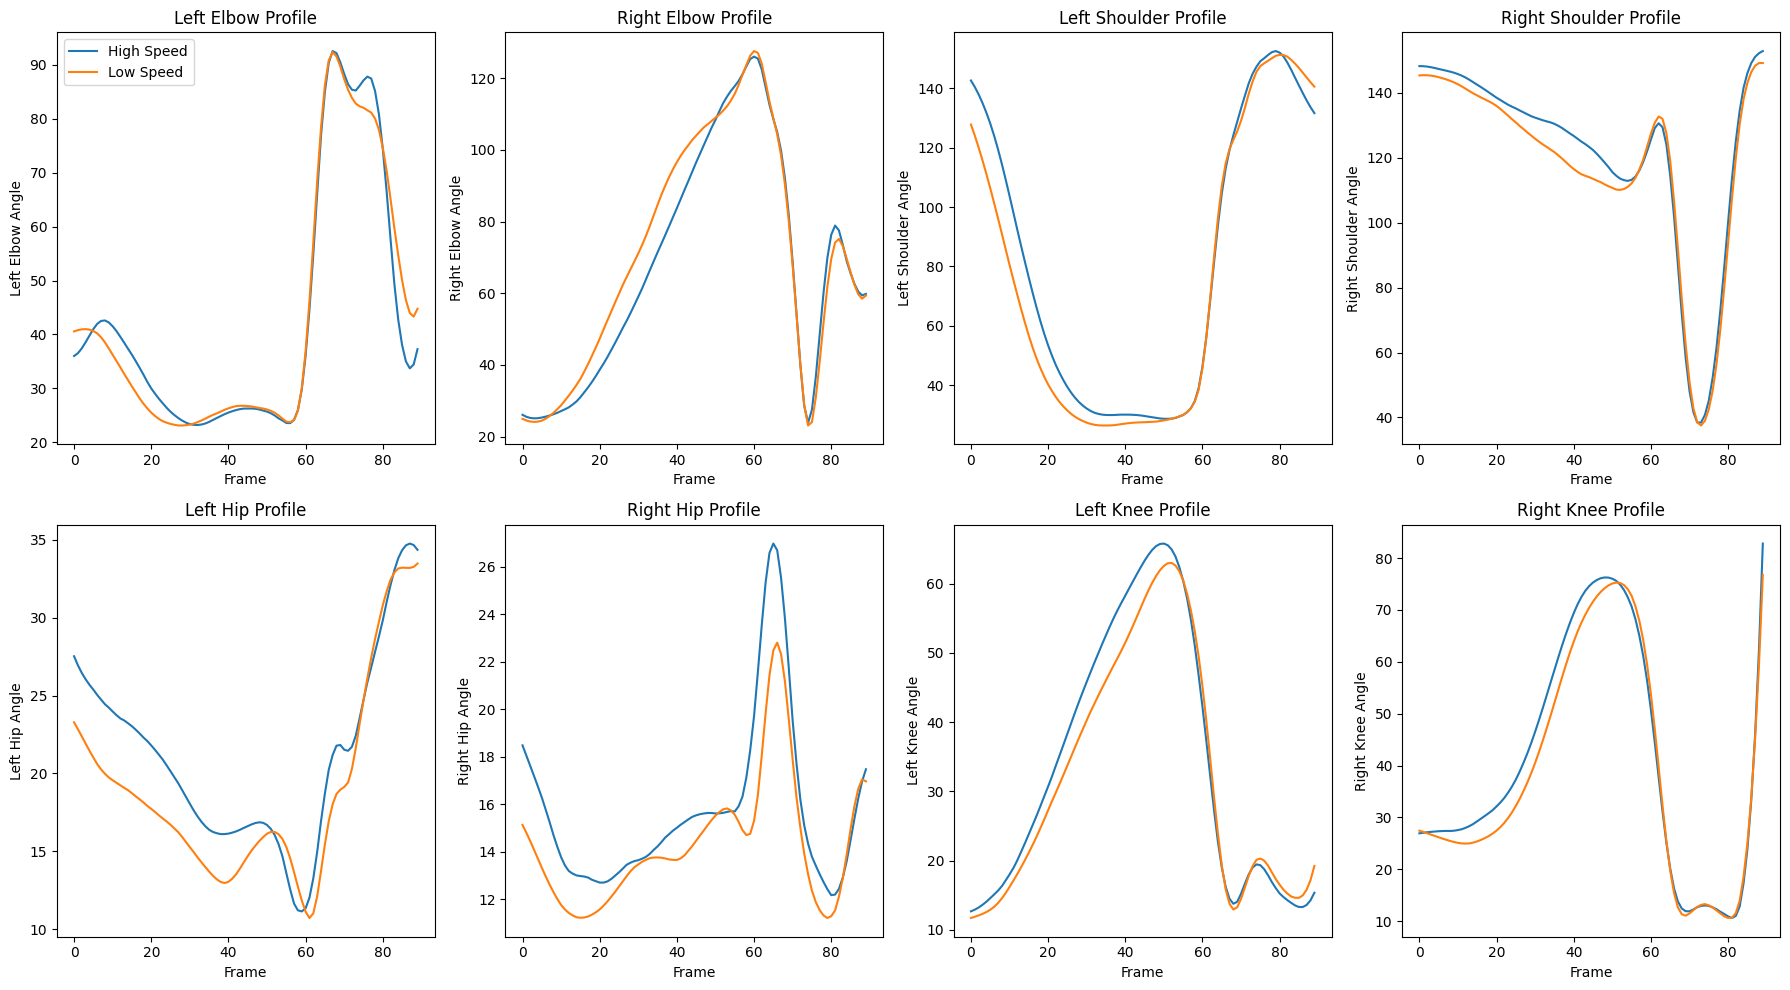

Mean absolute joint angle profile difference (high vs low speed):
Left Elbow: 2.85
Right Elbow: 5.06
Left Shoulder: 7.06
Right Shoulder: 4.42
Left Hip: 2.50
Right Hip: 1.52
Left Knee: 2.89
Right Knee: 2.72
Regression coefficients (mean angles): {'left_elbow': np.float64(-0.1893232929341561), 'right_elbow': np.float64(5.9533456746528864e-05), 'left_shoulder': np.float64(0.190800338742007), 'right_shoulder': np.float64(0.08853813098628548), 'left_hip': np.float64(0.09677051687695988), 'right_hip': np.float64(0.0621029158382149), 'left_knee': np.float64(-0.04736726411245039), 'right_knee': np.float64(0.1961217872218656)}
Regression coefficients (std angles): {'left_elbow': np.float64(0.2459053292761744), 'right_elbow': np.float64(-0.23464316176477767), 'left_shoulder': np.float64(0.020488577101276016), 'right_shoulder': np.float64(0.021073518423367934), 'left_hip': np.float64(0.02606194533136964), 'right_hip': np.float64(0.10220245480694594), 'left_knee': np.float64(0.19884592298998982), 

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Define joint names in order
joint_names = [
    'left_elbow', 'right_elbow', 'left_shoulder', 'right_shoulder',
    'left_hip', 'right_hip', 'left_knee', 'right_knee'
]

# Assume: data is a dict with keys=video_name, each value is a dict with 'angles' (90,8) and 'speed'
video_names = list(data.keys())
speeds = [data[k]['speed'] for k in video_names]
angles_stacked = np.stack([data[k]['angles'] for k in video_names])  # shape: (n_instances, 90, 8)

n_instances, n_frames, n_joints = angles_stacked.shape

# 1. Compute mean and std of each joint angle per instance
mean_angles = angles_stacked.mean(axis=1)  # shape: (n_instances, 8)
std_angles  = angles_stacked.std(axis=1)   # shape: (n_instances, 8)

df_mean = pd.DataFrame(mean_angles, columns=[f'{jn}_mean' for jn in joint_names])
df_std  = pd.DataFrame(std_angles, columns=[f'{jn}_std' for jn in joint_names])
df_speed = pd.Series(speeds, name='speed')
df = pd.concat([df_mean, df_std, df_speed], axis=1)

# 2. Correlation between mean/std of joint angles and speed
corrs = {}
for col in df_mean.columns:
    corrs[col] = pearsonr(df[col], df['speed'])[0]
for col in df_std.columns:
    corrs[col] = pearsonr(df[col], df['speed'])[0]

corrs = pd.Series(corrs)
print("Correlation of joint angle metrics with speed:\n", corrs.sort_values(ascending=False))

# 3. Plotting
plt.figure(figsize=(16, 6))
for i, jn in enumerate(joint_names):
    plt.subplot(2, 4, i+1)
    sns.scatterplot(x=df[f'{jn}_mean'], y=df['speed'])
    plt.xlabel(f'{jn.replace("_", " ").title()} Mean Angle')
    plt.ylabel('Speed')
    plt.title(f'{jn.replace("_", " ").title()} Mean vs Speed')
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 6))
for i, jn in enumerate(joint_names):
    plt.subplot(2, 4, i+1)
    sns.scatterplot(x=df[f'{jn}_std'], y=df['speed'])
    plt.xlabel(f'{jn.replace("_", " ").title()} Std Angle')
    plt.ylabel('Speed')
    plt.title(f'{jn.replace("_", " ").title()} Std vs Speed')
plt.tight_layout()
plt.show()

# 4. Compare top vs bottom speed quartiles for joint angle profiles
high_speed_idx = df['speed'] > df['speed'].quantile(0.75)
low_speed_idx  = df['speed'] < df['speed'].quantile(0.25)

high_angle_profile = angles_stacked[high_speed_idx.values].mean(axis=0)  # (90,8)
low_angle_profile  = angles_stacked[low_speed_idx.values].mean(axis=0)   # (90,8)

plt.figure(figsize=(18,10))
for j, jn in enumerate(joint_names):
    plt.subplot(2,4,j+1)
    plt.plot(high_angle_profile[:,j], label='High Speed')
    plt.plot(low_angle_profile[:,j], label='Low Speed')
    plt.xlabel('Frame')
    plt.ylabel(f'{jn.replace("_", " ").title()} Angle')
    plt.title(f'{jn.replace("_", " ").title()} Profile')
    if j==0:
        plt.legend()
plt.tight_layout()
plt.show()

# 5. Identify which joint angles differ most between high/low speed
angle_diff = np.abs(high_angle_profile - low_angle_profile).mean(axis=0)
print("Mean absolute joint angle profile difference (high vs low speed):")
for j, jn in enumerate(joint_names):
    print(f"{jn.replace('_', ' ').title()}: {angle_diff[j]:.2f}")

# 6. Optional: Regression to predict speed from mean/var of joint angles
from sklearn.linear_model import LinearRegression
X = df[[f'{jn}_mean' for jn in joint_names] + [f'{jn}_std' for jn in joint_names]]
y = df['speed']
reg = LinearRegression().fit(X, y)
print("Regression coefficients (mean angles):", dict(zip(joint_names, reg.coef_[:n_joints])))
print("Regression coefficients (std angles):", dict(zip(joint_names, reg.coef_[n_joints:])))


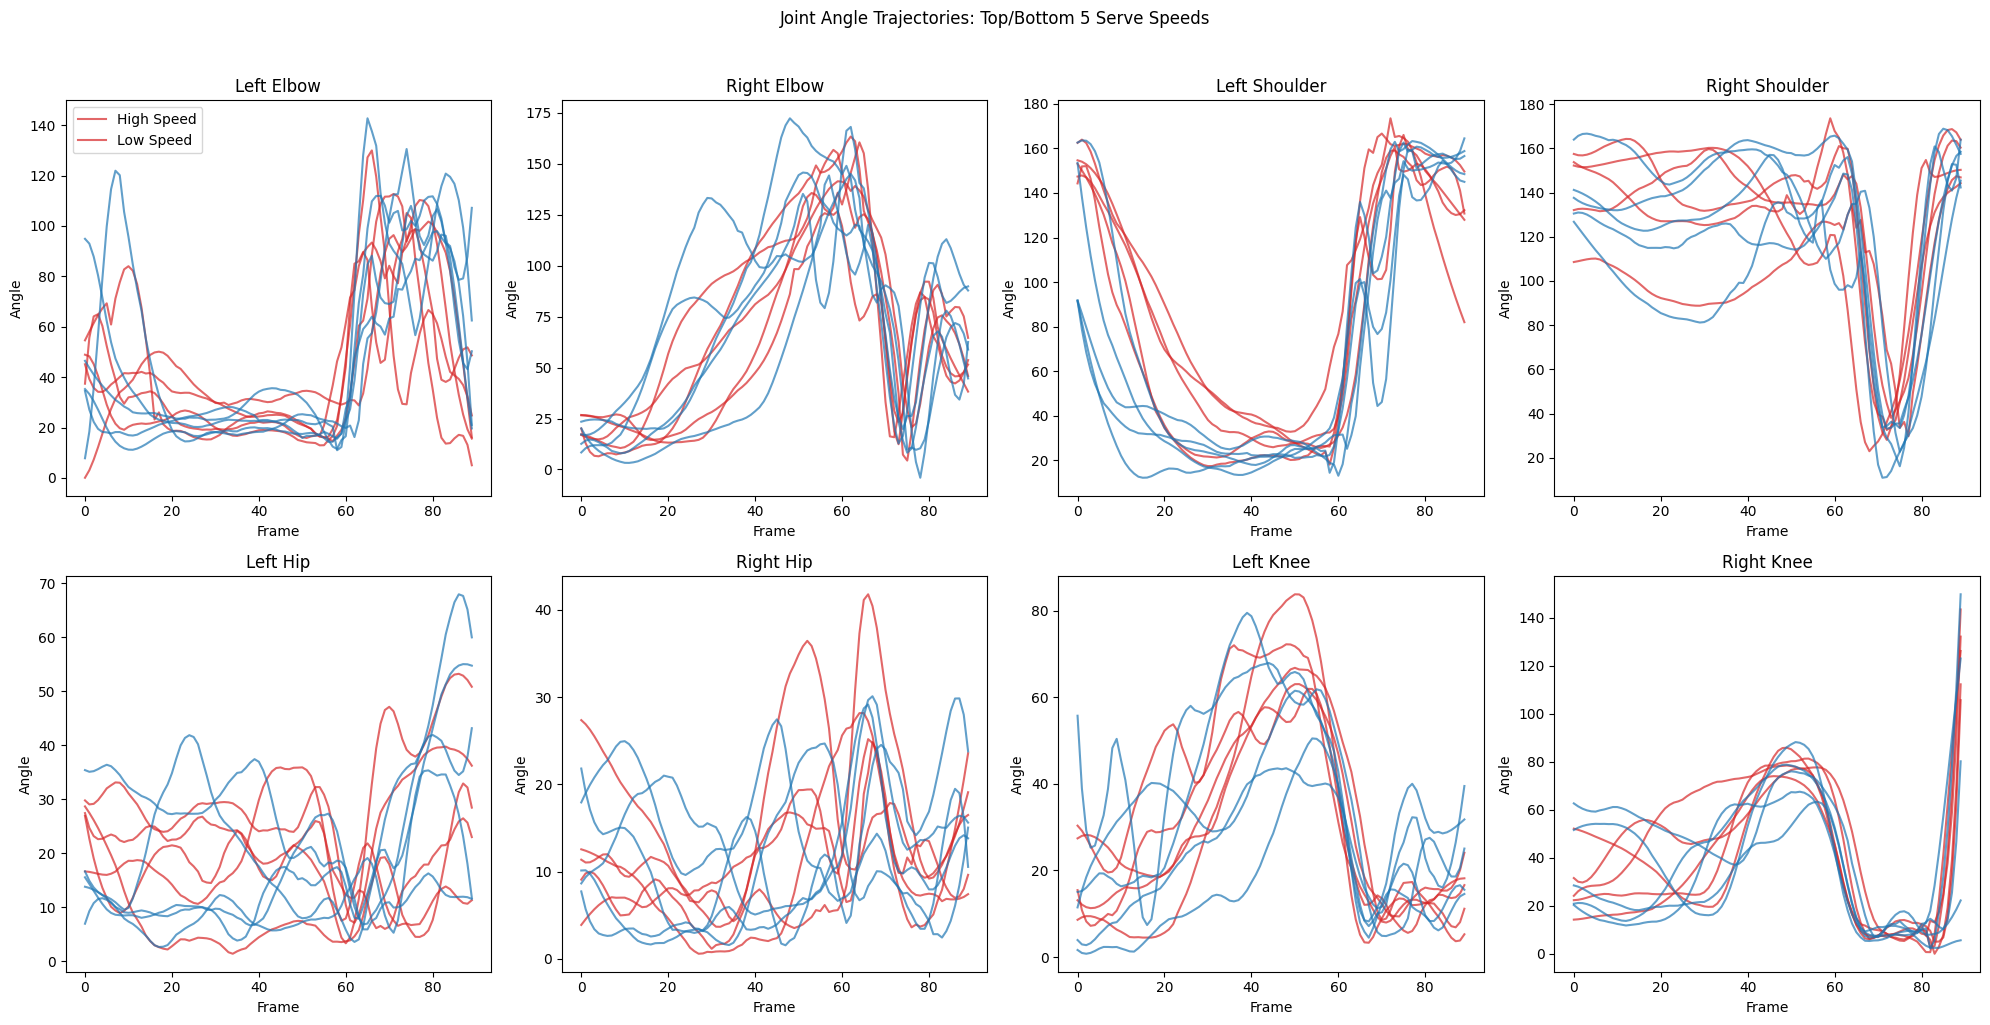

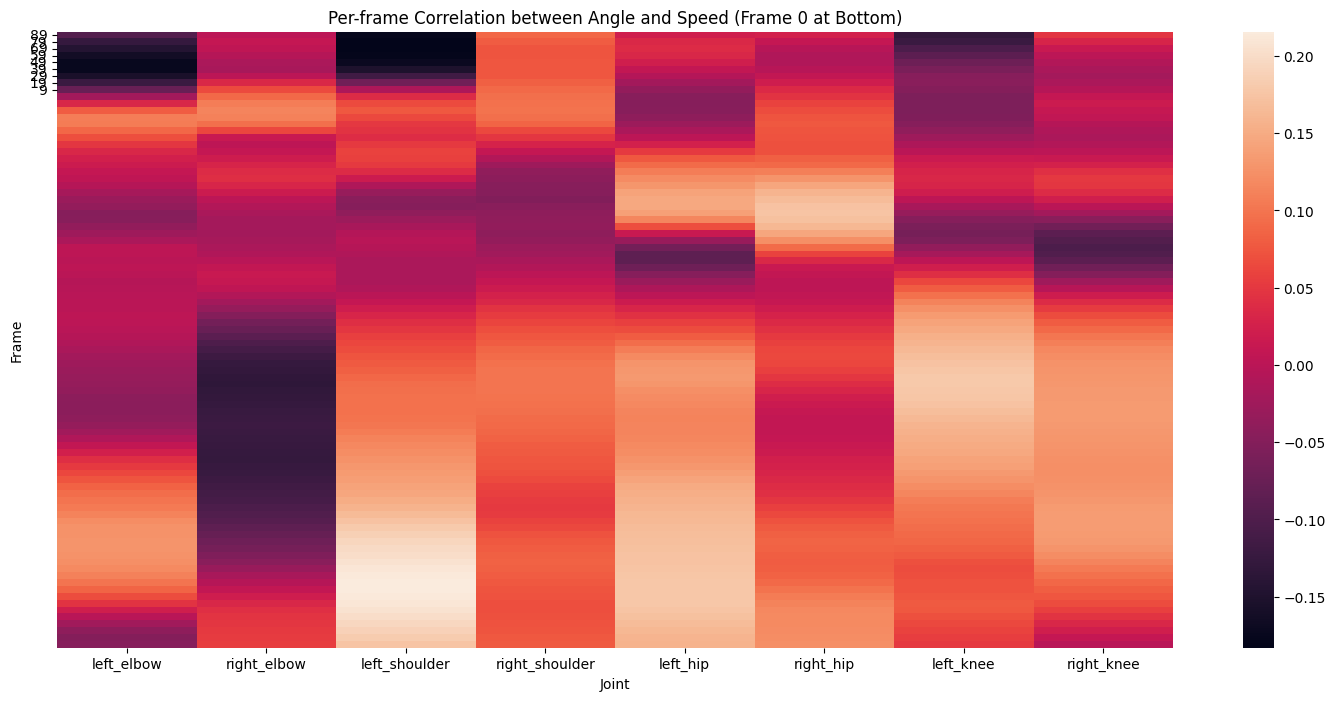

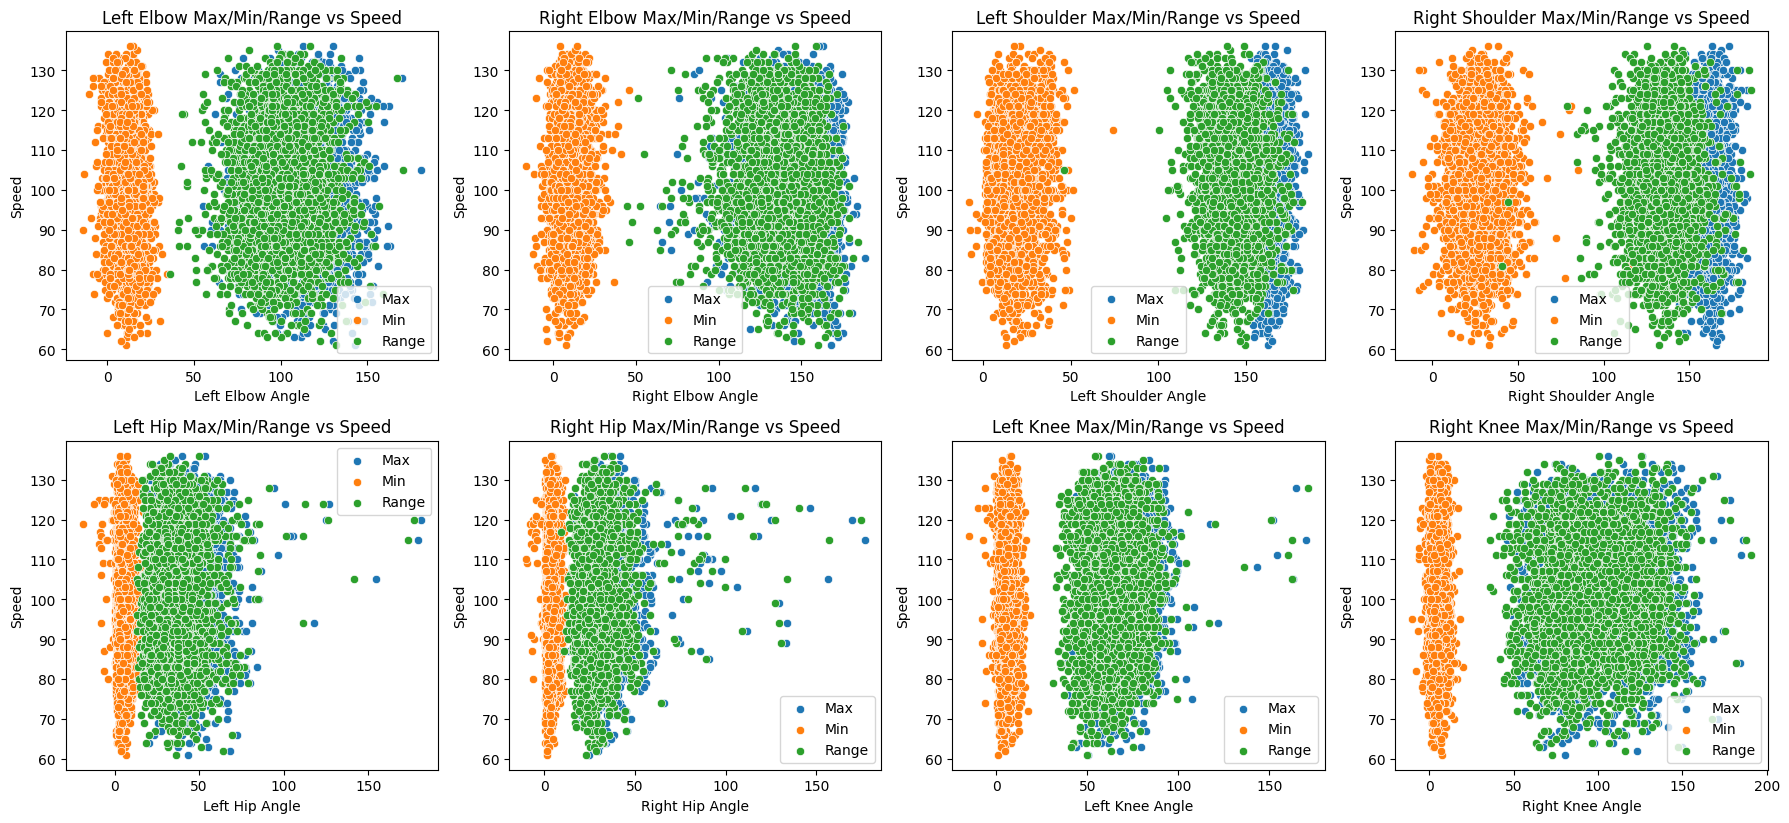

Frame 9, Joint left_shoulder has the largest mean difference (23.50) between top/bottom speed quartile.


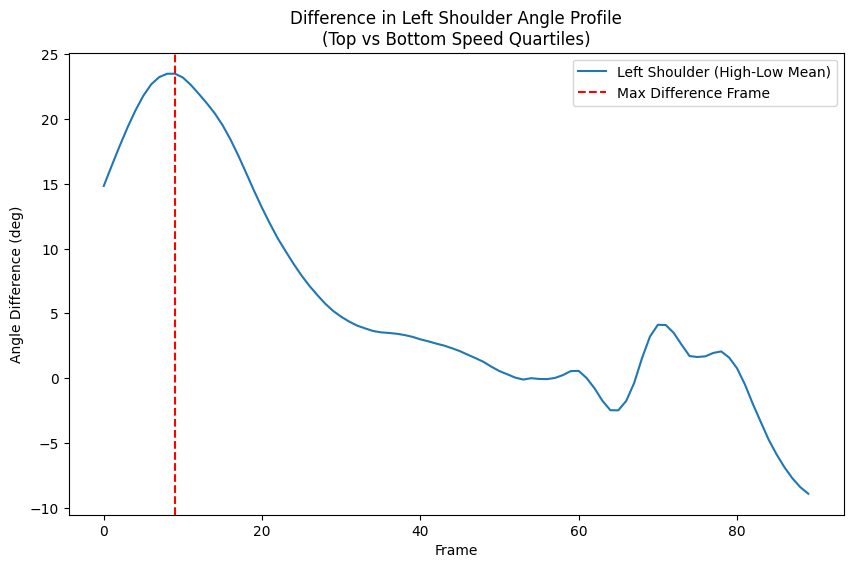

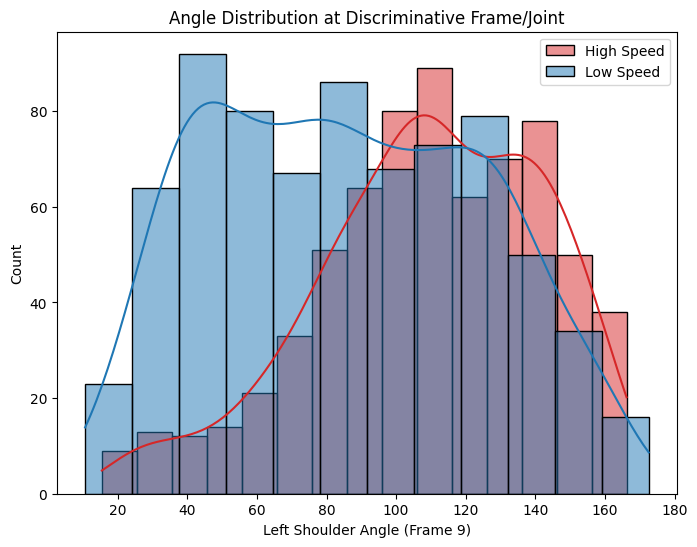

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

joint_names = [
    'left_elbow', 'right_elbow', 'left_shoulder', 'right_shoulder',
    'left_hip', 'right_hip', 'left_knee', 'right_knee'
]

video_names = list(data.keys())
speeds = np.array([data[k]['speed'] for k in video_names])
angles_stacked = np.stack([data[k]['angles'] for k in video_names])  # (n_instances, 90, 8)
n_instances, n_frames, n_joints = angles_stacked.shape

# 1. Visualize full time series of angles for highest and lowest speeds
high_idx = np.argsort(speeds)[-5:]
low_idx  = np.argsort(speeds)[:5]

plt.figure(figsize=(20, 10))
for j, jn in enumerate(joint_names):
    plt.subplot(2, 4, j+1)
    for i in high_idx:
        plt.plot(angles_stacked[i,:,j], alpha=0.7, label=f'High {i}' if j==0 else None, color='tab:red')
    for i in low_idx:
        plt.plot(angles_stacked[i,:,j], alpha=0.7, label=f'Low {i}' if j==0 else None, color='tab:blue')
    plt.title(jn.replace('_', ' ').title())
    plt.xlabel('Frame')
    plt.ylabel('Angle')
    if j==0:
        plt.legend(['High Speed', 'Low Speed'])
plt.suptitle('Joint Angle Trajectories: Top/Bottom 5 Serve Speeds', y=1.02)
plt.tight_layout()
plt.show()

# 2. For each frame (0-89), compute correlation of angle (over all videos) with speed
frame_corrs = np.zeros((n_frames, n_joints))
for j in range(n_joints):
    for f in range(n_frames):
        valid = ~np.isnan(angles_stacked[:,f,j]) & ~np.isnan(speeds)
        if valid.sum() > 2:
            r, _ = pearsonr(angles_stacked[valid, f, j], speeds[valid])
            frame_corrs[f, j] = r

# Flip the correlation matrix upside down for heatmap (frame 0 at the bottom)
frame_corrs_flipped = np.flipud(frame_corrs)

plt.figure(figsize=(18,8))
sns.heatmap(
    frame_corrs_flipped, 
    xticklabels=joint_names, 
    yticklabels=np.arange(n_frames-1, -1, -10)
)
plt.xlabel('Joint')
plt.ylabel('Frame')
plt.title('Per-frame Correlation between Angle and Speed (Frame 0 at Bottom)')
plt.show()

# 3. For each joint, plot max, min, and range of angles vs speed
plt.figure(figsize=(18, 12))
for j, jn in enumerate(joint_names):
    max_angles = angles_stacked[:,:,j].max(axis=1)
    min_angles = angles_stacked[:,:,j].min(axis=1)
    range_angles = max_angles - min_angles
    plt.subplot(3, 4, j+1)
    sns.scatterplot(x=max_angles, y=speeds, label='Max')
    sns.scatterplot(x=min_angles, y=speeds, label='Min')
    sns.scatterplot(x=range_angles, y=speeds, label='Range')
    plt.xlabel(f'{jn.replace("_", " ").title()} Angle')
    plt.ylabel('Speed')
    plt.title(f'{jn.replace("_", " ").title()} Max/Min/Range vs Speed')
    if j==0:
        plt.legend()
plt.tight_layout()
plt.show()

# 4. Find which joint/frame combo best distinguishes top/bottom quartile
high_speed_idx = speeds > np.quantile(speeds, 0.75)
low_speed_idx  = speeds < np.quantile(speeds, 0.25)
angle_diff = (angles_stacked[high_speed_idx].mean(axis=0) - angles_stacked[low_speed_idx].mean(axis=0))  # (90,8)
abs_diff = np.abs(angle_diff)
best_frame, best_joint = np.unravel_index(np.argmax(abs_diff), abs_diff.shape)
print(f"Frame {best_frame}, Joint {joint_names[best_joint]} has the largest mean difference ({abs_diff[best_frame, best_joint]:.2f}) between top/bottom speed quartile.")

plt.figure(figsize=(10,6))
plt.plot(angle_diff[:, best_joint], label=f"{joint_names[best_joint].replace('_',' ').title()} (High-Low Mean)")
plt.axvline(best_frame, color='r', linestyle='--', label='Max Difference Frame')
plt.xlabel('Frame')
plt.ylabel('Angle Difference (deg)')
plt.title(f'Difference in {joint_names[best_joint].replace("_"," ").title()} Angle Profile\n(Top vs Bottom Speed Quartiles)')
plt.legend()
plt.show()

# 5. Optional: Visualize distribution of angle values at the most discriminative joint/frame
plt.figure(figsize=(8,6))
sns.histplot(angles_stacked[high_speed_idx, best_frame, best_joint], label='High Speed', color='tab:red', kde=True)
sns.histplot(angles_stacked[low_speed_idx, best_frame, best_joint], label='Low Speed', color='tab:blue', kde=True)
plt.xlabel(f'{joint_names[best_joint].replace("_"," ").title()} Angle (Frame {best_frame})')
plt.ylabel('Count')
plt.title(f'Angle Distribution at Discriminative Frame/Joint')
plt.legend()
plt.show()
